In [1]:
import numpy as np
from typing import Callable

class Integrators:

    a: float
    b: float
    dx: float
    f: Callable[[np.array],np.array]
    x: np.array
    fx: np.array

    def __init__(self, a, b, dx, f, av=None):
        self.a = a
        self.b = b
        self.dx = dx
        self.f = f
        self.x = np.arange(a,b,dx)
        self.fx = self.f(self.x)
        self.av = av

    def trapezoid(self):
        result = 0
        for i in range(0, len(self.x) - 1):
            result += (self.dx/2)*(self.fx[i] + self.fx[i+1])
        return result, self.error(result)
    
    def simpsons13(self):
        result = (self.dx/3)*(self.fx[0] + self.fx[-1] + 4*np.sum(self.fx[1:-1:2]) + 2*np.sum(self.fx[2:-1:2]))
        return result, self.error(result)
    
    def error(self, result):
        if self.av != None:
            error = self.av - result
            return error
    
I = Integrators(0,np.pi,0.2,lambda x: np.sin(x), 2)
print(I.trapezoid())
print(I.simpsons13())

(1.9833547618570557, 0.016645238142944274)
(1.973980231305464, 0.02601976869453604)


In [2]:
import numpy as np

a = 0
b = np.pi
n = 19
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

print(h)
print(I_trap)
print(err_trap)

0.17453292519943295
1.994920463583452
0.005079536416547903


In [3]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(h)
print(len(x))

print(I_simp)
print(err_simp)

0.3141592653589793
11
2.0001095173150043
-0.00010951731500430384


In [14]:
x = np.zeros((2,3))
x[:,0] = [1, 2]
x

array([[1., 0., 0.],
       [2., 0., 0.]])

In [15]:
np.matrix()

matrix([[2, 3]])

In [26]:
A = np.zeros((10,10))
A[0,0] = 1
A[-1,-1] = 1


i_ind = np.arange(1,9,1)
j_ind_low = np.arange(0,8,1)
j_ind_high = np.arange(2,10,1)
A[i_ind, j_ind_low ] = 3
A[i_ind, i_ind] = -1
A[i_ind, j_ind_high] = 3
A

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3., -1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  3., -1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., -1.,  3.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., -1.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., -1.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  3., -1.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  3., -1.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., -1.,  3.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [49]:
def init_cond(x):
    val = np.square(np.sin(2*np.pi*x))
    return val

def left_bound(t):
    val = 0 
    return val 

def right_bound(t):
    val = 0 
    return val 

a = 0
b = 1
D = 1 # heat diffusivity constant 
sigma = 1/3 
N = 50
h = (b-a)/N-1
k = (sigma/D)*h**2

m = N
A = np.zeros((m, m))
A[0,0] = A[-1,-1] = 1

i_ind = np.arange(1, m - 1, 1)
j_ind_low = np.arange(0, m - 2, 1)
j_ind_high = np.arange(2, m, 1)
A[i_ind, i_ind] = 1 + 2*sigma
A[i_ind, j_ind_low ] = -sigma
A[i_ind, j_ind_high] = -sigma
A_inv = np.linalg.inv(A)


W = np.zeros((100,m))
W[0,1:-1] = init_cond(np.linspace(a, b, m - 2))
W[0,0] = W[-1,-1] = 0 

for i in range(0, W.shape[0] - 1):
    W[i+1,:] = A_inv@W[i,:]

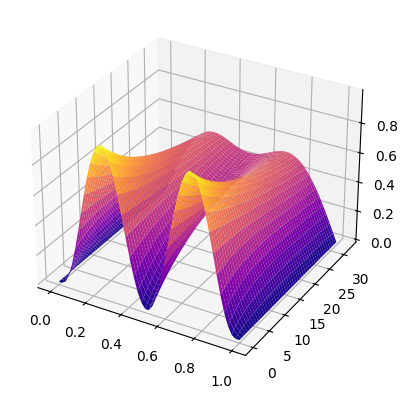

(100, 50)
(100, 50)
(100, 50)


In [54]:
import matplotlib.pyplot as plt

xx, tt = np.meshgrid(np.linspace(a, b, N), np.linspace(0, 100*k, 100))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
np.shape(xx)
surf = ax.plot_surface(xx,tt,W,cmap='plasma')
#ax.set_xlabel('x',fontsize=20)
#ax.set_ylabel('time',fontsize=20)
#ax.set_zlabel('T',fontsize=20)
#cbar= fig.colorbar(surf, shrink=0.5, aspect=5)
#cbar.ax.set_title('T')
plt.show()
print(xx.shape)
print(tt.shape)
print(W.shape)